# State Machines in Python - Part 1

## STMPY

We will use a framework for State Machines in Python. The framework was created especially for this course and education purposes, and is open source. More about the code later. Let's first get started.

### Check Installation

Run the following cell. it should output the current version of stmpy you have installed. 

In [ ]:
import stmpy
print('STMPY Version installed: {}'.format(stmpy.__version__))

If you haven't installed stmpy, install it via the following command line commands:

`pip install stmpy`

Or if you need to update to a newer version:

`pip install --upgrade stmpy`

Once you have done this  the command line, come back to this notebook and restart the kernel. (Grey menu bar at the top of this page, Kernel / Restart.) Then run the cell above again.

# Getting Started - Step by Step

*In the following we go through the setup of a single state machine, almost line by line so all details are covered. Make sure to execute every notebook cell with Python code in it, and make sure it executes correctly without error message. The next tutorials will present code in a more compact way. So if you feel confident in Python and think this goes to slow, there's hope. If you struggle a bit with Python, have an extra close look at the details. Also, ask questions on Piazza.*

Let's start with a simple state machine:

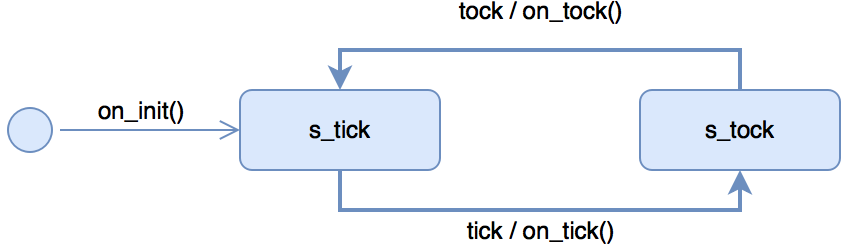

The state machine calls method `on_init()` when it starts, and goes into state `s_tick`. Then, it toggles basck and forth to the `s_tock` state, controlled by timers.

Since this state machine works alongside Python code, the actions in the transitions directly refer to Python methods. We declare them in a dedicated class:

In [ ]:
class Tick:

    def on_init(self):
        print('Init!')
        self.ticks = 0
        self.tocks = 0
        self.stm.start_timer('tick', 1000)

    def on_tick(self):
        print('Tick! {}'.format(self.ticks))
        self.ticks = self.ticks + 1
        self.stm.start_timer('tock', 1000)

    def on_tock(self):
        print('Tock! {}'.format(self.tocks))
        self.tocks = self.tocks + 1
        self.stm.start_timer('tick', 1000)

Above you can see the three methods the state machine refers to. Within their body, they control simple counter variables `ticks` and `tocks`. The methods also start the timers `tick` and `tock`, with the method `self.stm.start_timer()`.

We also need an instance of the Tick class for later:

In [ ]:
tick = Tick()

Let's declare the state machine logic. We do so by creating Python dictionaries for each of the transitions above:

In [ ]:
# initial transition
t0 = {'source': 'initial', 
      'target': 's_tick', 
      'effect':'on_init'
     }

# transition s_tick ----> s_tock
t1 = {'trigger':'tick', 
      'source':'s_tick', 
      'target':'s_tock', 
      'effect':'on_tick'
     }

# transition s_tock ----> s_tick
t2 = {'trigger':'tock', 
      'source':'s_tock', 
      'target':'s_tick', 
      'effect':'on_tock'
     }

First, we need to import the Machine class:

In [ ]:
from stmpy import Machine

Now we declare an instance for the machine, passing it the Tick object from above and the transitions. It also gets a name.

In [ ]:
tick_tock_machine = Machine(transitions=[t0, t1, t2], obj=tick, name='tick_tock')

Now we need to do one more technical thing. Above you see that the Tick class needs access to the `Machine` class so that it can start timers. For this, we use variable `stm` in the Tick class. We have to set the value of this variable now that we have created the corresponding machine:

In [ ]:
tick.stm = tick_tock_machine

Now the state machine is declared and ready, we only have to run it. State machines are not executed directly, but assigned to a **Driver**. One driver corresponds to one thread and can execute many state machines at the same time. 

In [ ]:
from stmpy import Driver

driver = Driver()

# add our state machine to the driver
driver.add_machine(tick_tock_machine)

Now the driver is declared. What's left is to start it. Since this machine is describing an endless loop, we limit the number of transitions the driver executes to 5. You will see that the notebook cell is active until the driver stops.

In [ ]:
# start the driver, with limited number of transitions
driver.start(max_transitions=5)

You should now see that the state machine prints the following under the cell above:

    Init!
    Tick! 0
    Tock! 0
    Tick! 1
    Tock! 1
    
You can also observe that the transitions are triggered by the timers, one every 1000 milliseconds.

# Repetition

- Transitions are declared as Python dictionaries.
- Actions on transitions are declared in a special class for that state machine.
- A `Machine` represents a state machine.
- A `Driver` is needed to execute one (or several) state machines.